<a href="https://colab.research.google.com/github/brianellis1997/Music_Generation/blob/main/Popularity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/brianellis1997/Music_Generation.git

Cloning into 'Music_Generation'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 141 (delta 66), reused 36 (delta 7), pack-reused 0
Receiving objects: 100% (141/141), 904.28 KiB | 6.75 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DS340/spotify_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


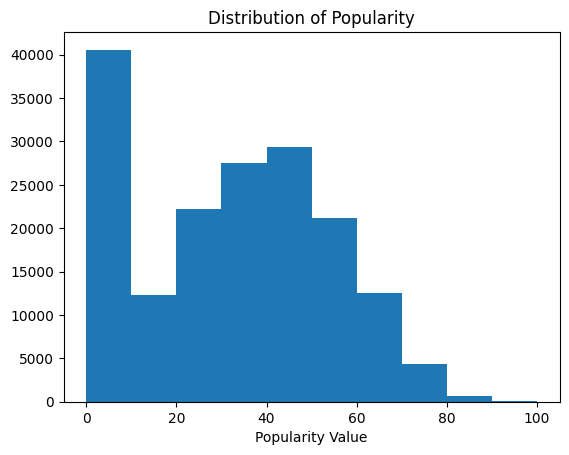

In [9]:
plt.hist(df['popularity'])
plt.title('Distribution of Popularity')
plt.xlabel('Popularity Value')
plt.show()

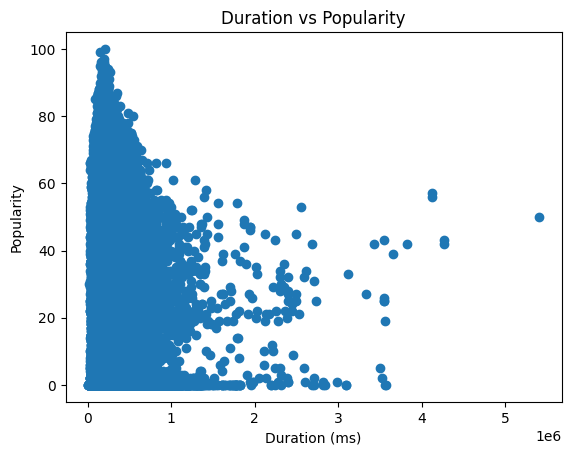

In [10]:
plt.scatter(x=df['duration_ms'], y=df['popularity'])
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Duration vs Popularity')
plt.show()

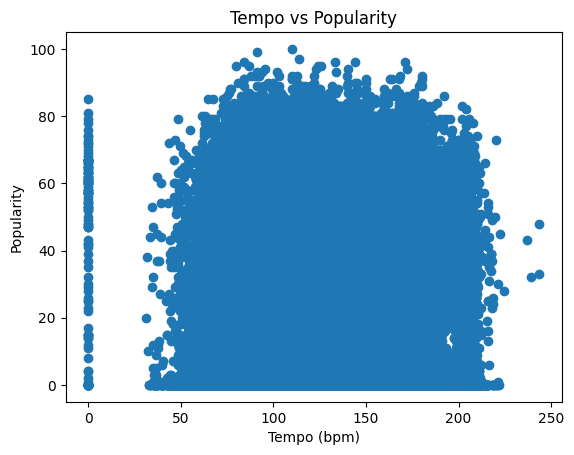

In [11]:
plt.scatter(x=df['tempo'], y=df['popularity'])
plt.xlabel('Tempo (bpm)')
plt.ylabel('Popularity')
plt.title('Tempo vs Popularity')
plt.show()

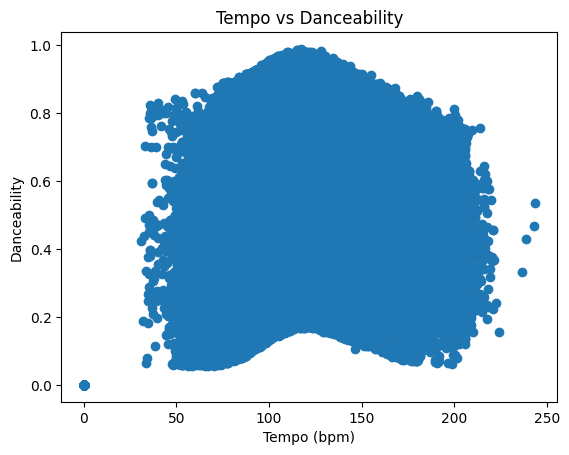

In [13]:
plt.scatter(x=df['tempo'], y=df['danceability'])
plt.xlabel('Tempo (bpm)')
plt.ylabel('Danceability')
plt.title('Tempo vs Danceability')
plt.show()

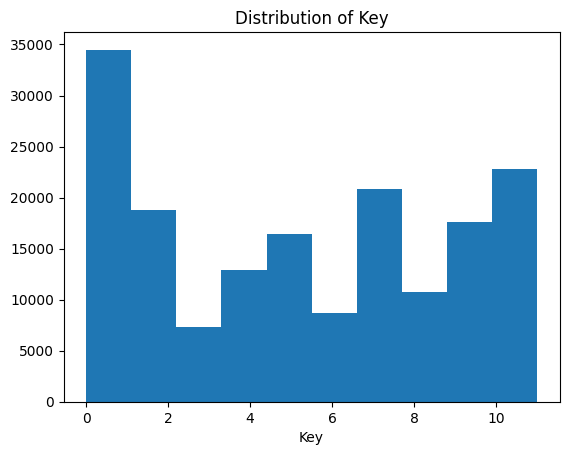

In [14]:
plt.hist(df['key'])
plt.title('Distribution of Key')
plt.xlabel('Key')
plt.show()

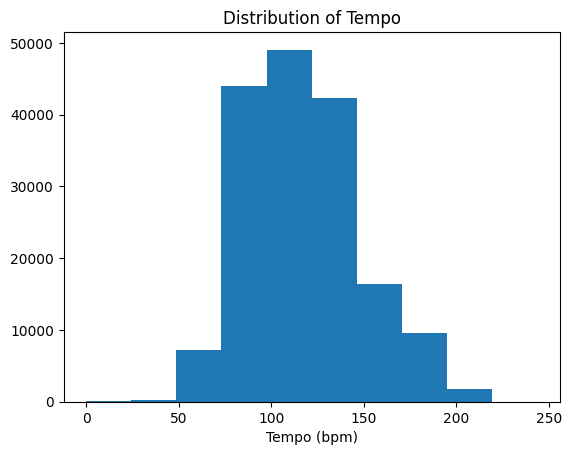

In [15]:
plt.hist(df['tempo'])
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (bpm)')
plt.show()

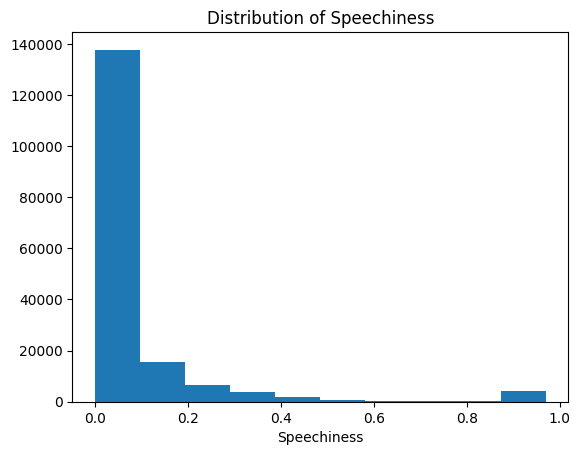

In [16]:
plt.hist(df['speechiness'])
plt.title('Distribution of Speechiness')
plt.xlabel('Speechiness')
plt.show()

In [17]:
df['mode'].value_counts()

1    120635
0     50018
Name: mode, dtype: int64

In [81]:
from music21 import *

# Load MIDI file
midi_file_path = '/content/drive/MyDrive/DS340/Johann Sebastian Bach/Invention 1, BWV 772.mid'
midi_stream = converter.parse(midi_file_path)

# Extract key signature
key_signature = None
for event in midi_stream.flat.getElementsByClass('KeySignature'):
    key_signature = event
    break

if key_signature:
    print("Key signature:", key_signature)
else:
    print("Key signature not found in the MIDI file.")

Key signature: G# major


/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [35]:
# Get total duration of the piece
total_duration = midi_stream.duration.quarterLength

print("Total duration:", total_duration, "quarters")

Total duration: 88.0 quarters


In [38]:
88/80

1.1

In [55]:
# Extract tempo
tempo = None
for event in midi_stream.flat.notesAndRests:
    if isinstance(event, event.MetronomeMark):
        tempo = event
        break

if tempo:
    print("Tempo:", tempo)
else:
    print("Tempo information not found in the MIDI file.")

/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


AttributeError: 'Rest' object has no attribute 'MetronomeMark'

In [58]:
all_parts = []
for part in midi_stream.parts:
  part_tuples=[]
  try:
    track_name = part[0].bestName()
  except AttributeError:
    track_name = "None"
  part_tuples.append(track_name)
  for even in part:
    for y in event.contextSites():
      if y[0] is part:
        offset=y[1]
    if getattr(event, 'isNote', None) and event.isNote:
      part_tuples.append([event.quarterLength, event.pitch.midi, offset])
    if getattr(event, 'isRest', None) and event.isRest:
      part_tuples.append([event.quarterLength, 'Rest', offset])

  all_parts.append(part_tuples)

In [79]:
tempo = None
for event in midi_stream.flat:
  if event.str.contains('MetronomeMark')
  tempo = event

RH: 
LH: 
<music21.clef.TrebleClef>
<music21.clef.BassClef>
<music21.tempo.MetronomeMark andantino Quarter=80>
<music21.tempo.MetronomeMark andantino Quarter=80>
G# major
G# major
<music21.meter.TimeSignature 4/4>
<music21.meter.TimeSignature 4/4>
<music21.note.Rest 16th>
<music21.note.Rest 2.25ql>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Rest 1.25ql>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G>
<music21.note

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [82]:

# Extract tempo
tempo = None
for event in midi_stream.flat:
    if 'MetronomeMark' in event.classes:
        tempo = event
        break

if tempo:
    print("Tempo:", tempo)
else:
    print("Tempo information not found in the MIDI file.")


Tempo: <music21.tempo.MetronomeMark andantino Quarter=80>


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [83]:
# Extract tempo
tempo_value = None
for event in midi_stream.flat:
    if 'MetronomeMark' in event.classes:
        tempo_value = int(event.number)
        break

if tempo_value is not None:
    print("Tempo:", tempo_value)
else:
    print("Tempo information not found in the MIDI file.")

Tempo: 80


In [85]:
type(tempo_value)

int

In [86]:
tempo_value

80